In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import OrdinalEncoder
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv("/content/Copy of energy_production (1).csv", sep=';', skipinitialspace=True)
df

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
0,9.59,38.56,1017.01,60.10,481.30
1,12.04,42.34,1019.72,94.67,465.36
2,13.87,45.08,1024.42,81.69,465.48
3,13.72,54.30,1017.89,79.08,467.05
4,15.14,49.64,1023.78,75.00,463.58
...,...,...,...,...,...
9563,17.10,49.69,1005.53,81.82,457.32
9564,24.73,65.34,1015.42,52.80,446.92
9565,30.44,56.24,1005.19,56.24,429.34
9566,23.00,66.05,1020.61,80.29,421.57


#EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temperature        9568 non-null   float64
 1   exhaust_vacuum     9568 non-null   float64
 2   amb_pressure       9568 non-null   float64
 3   r_humidity         9568 non-null   float64
 4   energy_production  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
# Summary statistics of the numerical columns
df.describe()

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


Temperature: With an average of 19.65°C and a wide range from 1.81°C to 37.11°C, indicating diverse temperatures.

Exhaust Vacuum: Mean vacuum around 54.31 units, ranging from 25.36 to 81.56 units, showing significant variability.

Ambient Pressure: Average pressure of 1013.26 millibars, with a narrow range from 992.89 to 1033.3 millibars, suggesting less variability.

Relative Humidity: Average humidity at 73.31%, ranging from 25.56% to 100.16%, indicating diverse environmental conditions.

Energy Production: Mean production of 454.37 units, ranging from 420.26 to 495.76 units, showing variability potentially influenced by other variables.

In [ ]:
df.shape

(9568, 5)

#To deal with duplicated values

In [ ]:
#finding duplicates
df.duplicated().sum()

41

In [ ]:
#Print the duplicated values
df[df.duplicated()]

,temperature,exhaust_vacuum,amb_pressure,r_humidity,energy_production
2066,10.72,41.17,1019.68,60.71,479.21
2780,28.41,75.60,1018.48,56.07,440.28
3333,24.79,75.60,1017.07,68.23,440.05
3467,7.64,41.17,1020.01,75.14,488.53
3550,25.42,75.60,1017.39,77.63,438.24
3747,11.61,41.17,1019.57,58.82,476.81
4292,12.27,41.17,1019.41,58.10,475.13
4528,24.63,59.57,1010.45,85.36,440.67
5065,8.57,41.17,1020.18,72.47,484.20
5564,11.82,41.17,1019.50,55.74,475.61


In [ ]:
#Drop Duplicated records
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

now there are no duplicated values in our dataset.

# checking missing values

In [ ]:
#finding missing values
df.isnull().sum()

temperature          0
exhaust_vacuum       0
amb_pressure         0
r_humidity           0
energy_production    0
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100

temperature          0.0
exhaust_vacuum       0.0
amb_pressure         0.0
r_humidity           0.0
energy_production    0.0
dtype: float64

there are no missing values.

#Analysing data

In [ ]:
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

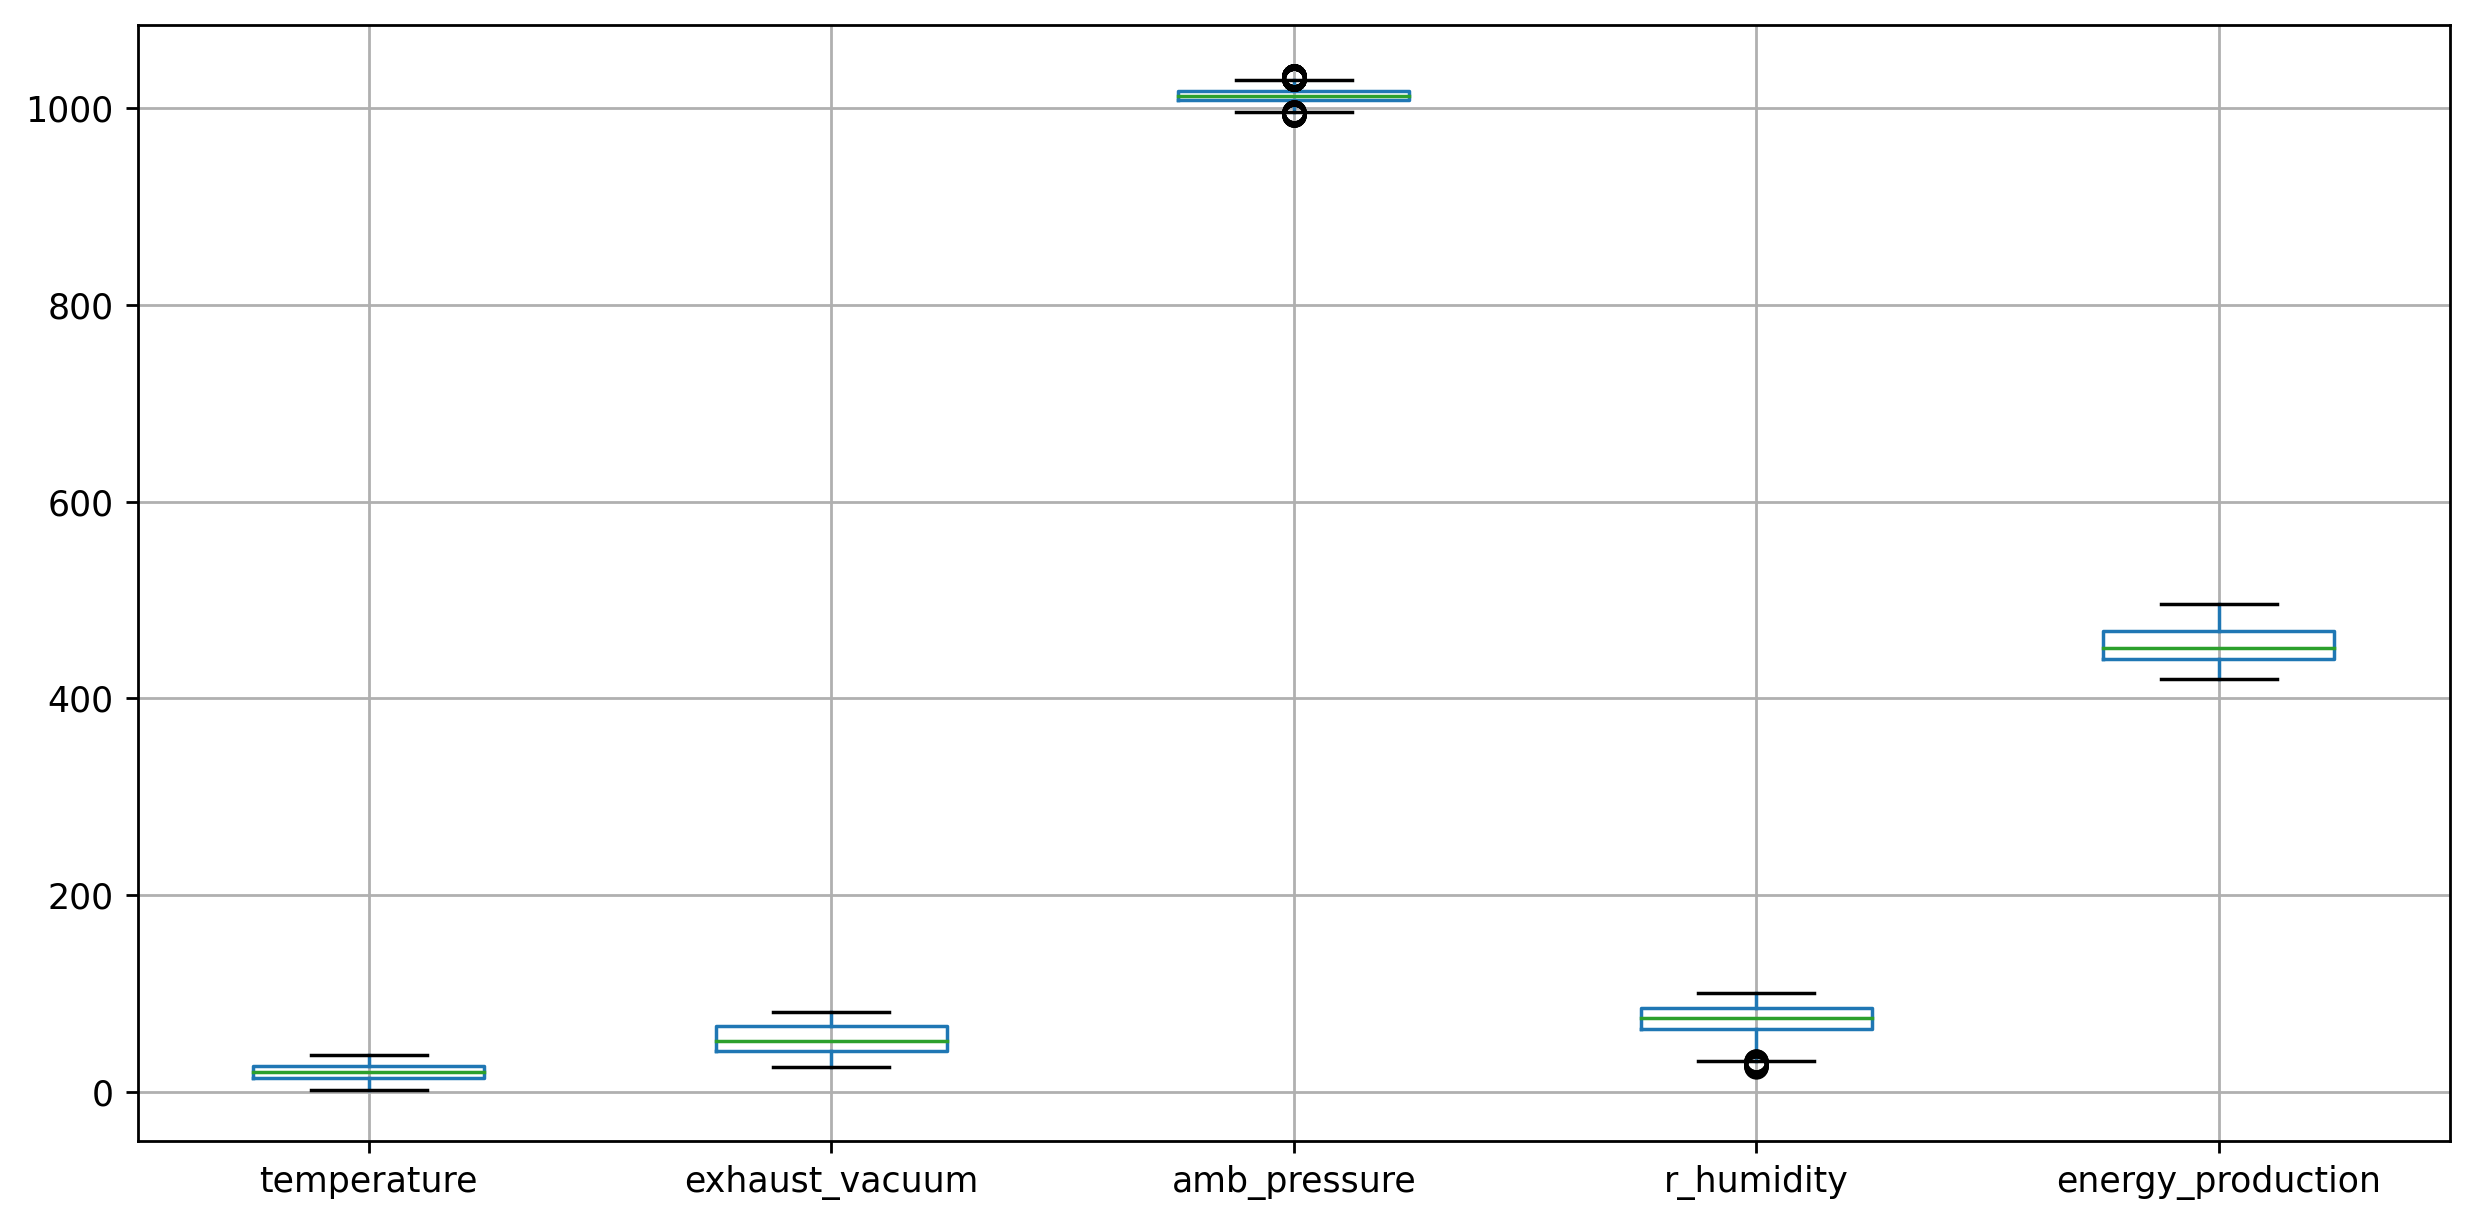

In [ ]:
df.boxplot()
plt.tight_layout()

#to delete outliers

In [ ]:
df.columns

Index(['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity',
       'energy_production'],
      dtype='object')

In [ ]:
import numpy as np
def calculate_whisker(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    return lw, uw

# Loop through the list and replace outliers
for i in ['amb_pressure', 'r_humidity']:
    lw, uw = calculate_whisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

we have deleted outliers so there are no outliers in this dataset

Text(0.5, 0.98, 'Pairplot')

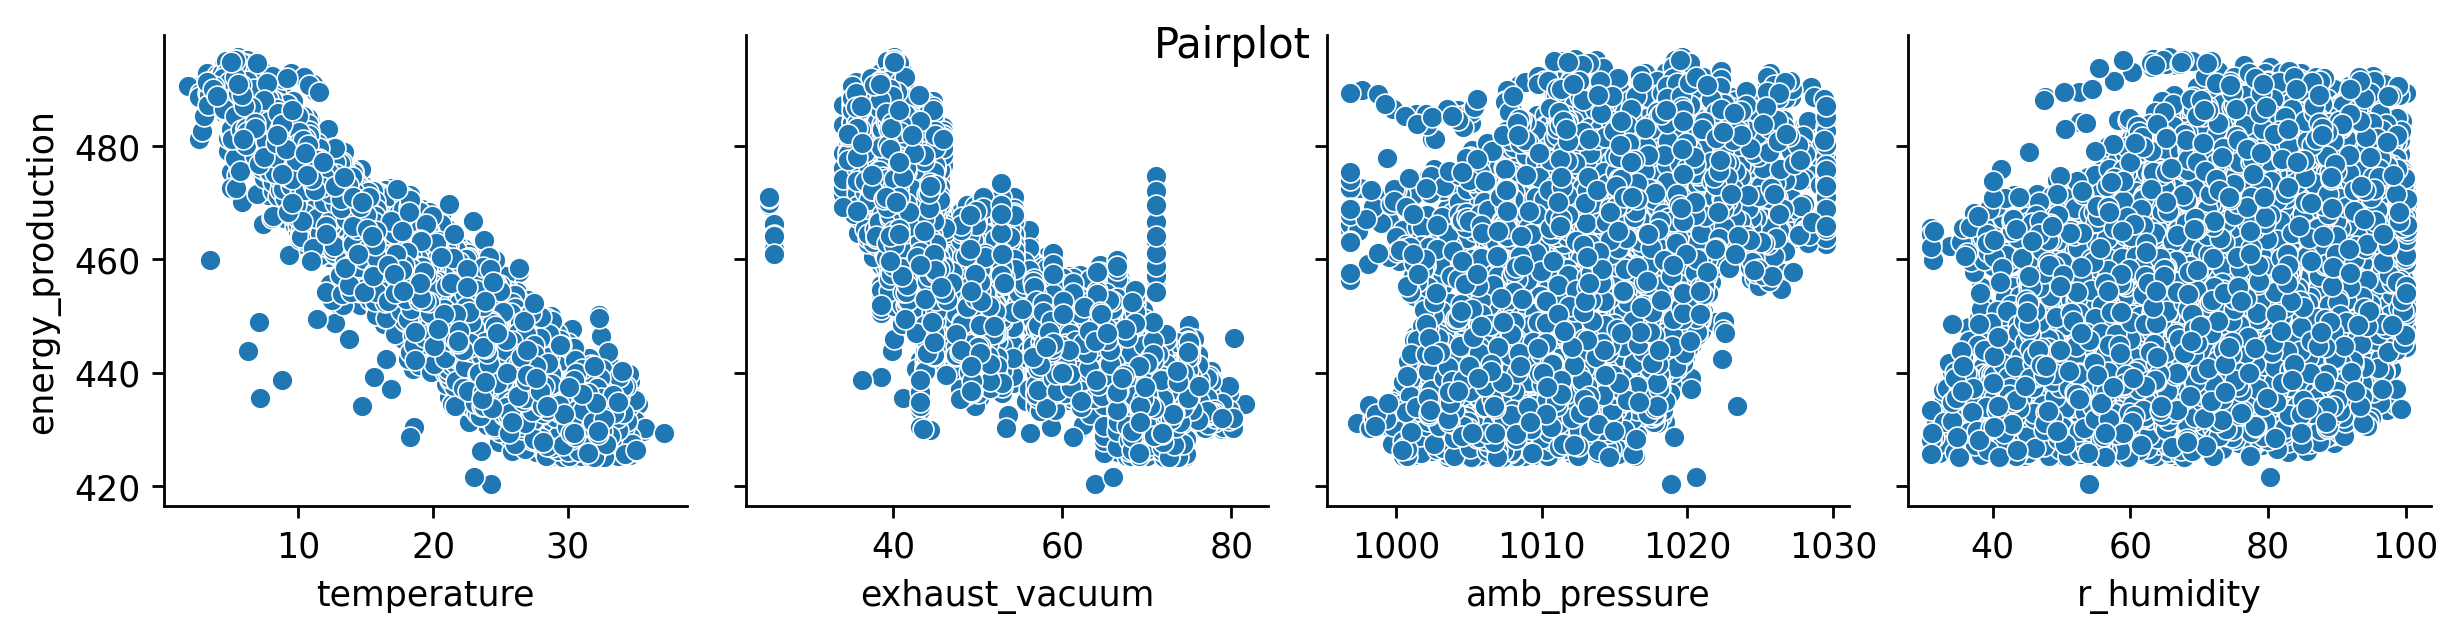

In [ ]:
# Pairplot
sns.pairplot(df, x_vars=['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity'], y_vars=['energy_production'])
plt.suptitle('Pairplot')

Temperature and Energy Production: There is a strong negative correlation. This suggests that as temperature increases, energy production tends to decrease, and vice versa.

Exhaust Vacuum and Energy Production: Similarly, there is a strong negative correlation.Higher exhaust vacuum levels are associated with lower energy production.

Ambient Pressure and Energy Production: There is a moderate positive correlation .This indicates that higher ambient pressure may be associated with higher energy production levels.

Relative Humidity and Energy Production: There is a moderate positive correlation . Higher relative humidity levels are associated with slightly higher energy production.

Text(0.5, 1.0, 'Correlation Heatmap')

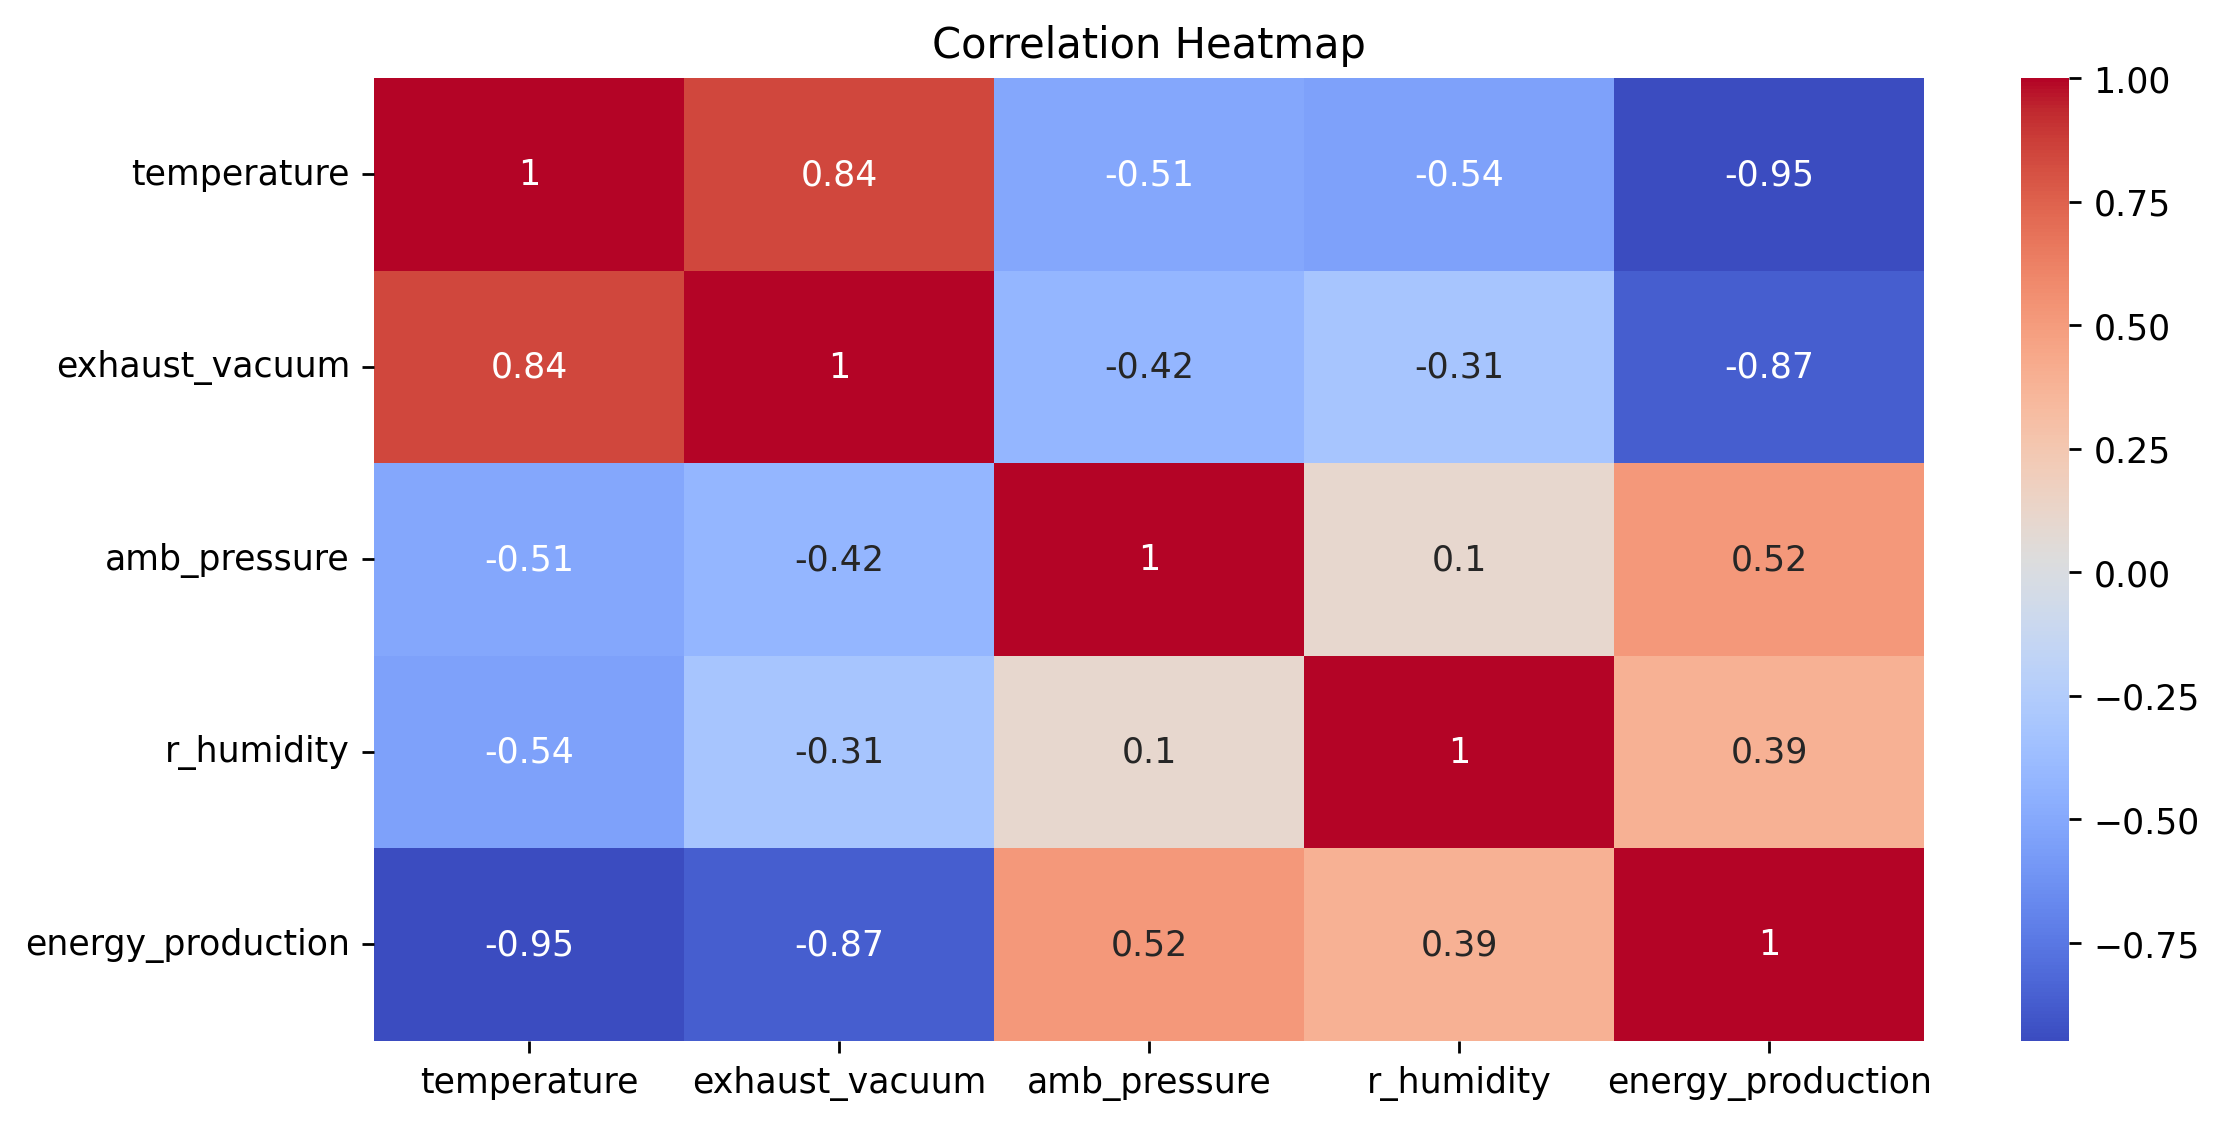

In [ ]:
# Correlation heatmap
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Ambient Pressure and r_humidity: There is a positive correlation.  
Exhaust Vacuum and temperature: Similarly, there is a strong positive correlation.

Ambient Pressure and Energy Production: There is a moderate positive correlation.

Relative Humidity and Energy Production: There is a moderate positive correlation.

Temperature and Exhaust Vacuum: Temperature and exhaust vacuum exhibit a strong positive correlation.

# Histogram

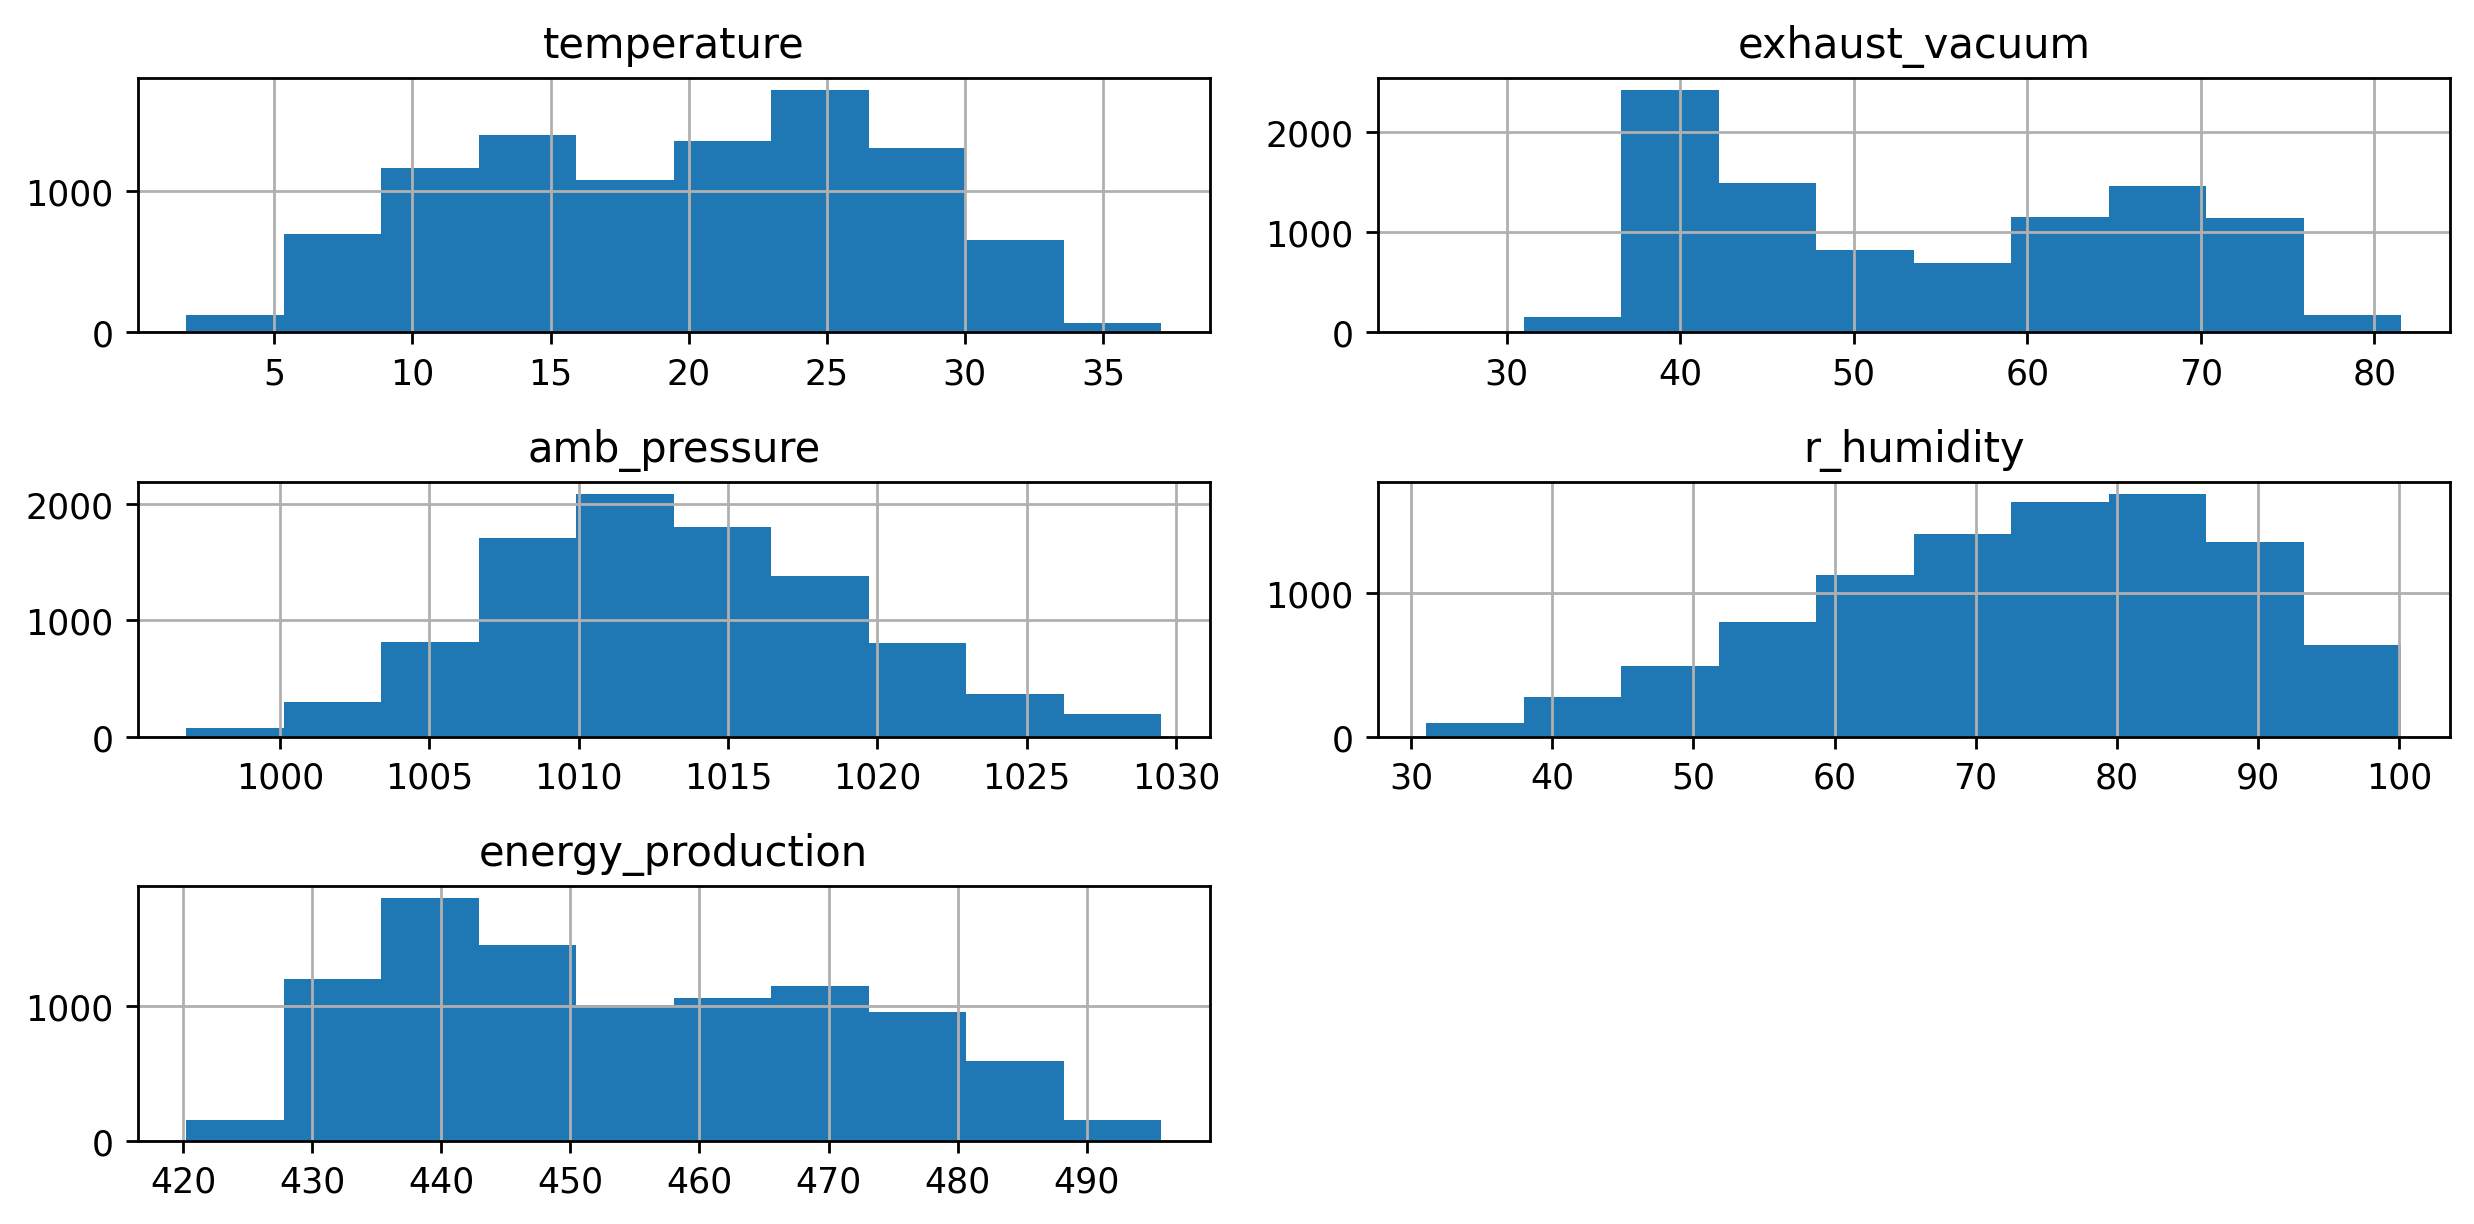

In [ ]:
df.hist()
plt.tight_layout()

#1) multiple linear regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Splitting the data into features and target variable
X = df[['temperature', 'exhaust_vacuum', 'amb_pressure', 'r_humidity']]
y = df['energy_production']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

Mean Squared Error: 20.875935421329707
Coefficients: [-1.97421098 -0.23379069  0.05893896 -0.1579187 ]
Intercept: 457.6566992205384
RMSE: 4.569019087433287
MAE: 3.6445256669355386


In [ ]:
model.score(X_test,y_test)*100

92.83104024765187

# Ridge regression

In [ ]:
# Ridge regression
from sklearn.linear_model import Ridge

# Train the model
ridgeR = Ridge(alpha = 1)
ridgeR.fit(X_train, y_train)
y_pred = ridgeR.predict(X_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print("Mean_Squared_error:",mean_squared_error_ridge)

# get ridge coefficient and print them
ridge_coefficient = pd.DataFrame()
ridge_coefficient["Columns"]= X_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

Mean_Squared_error: 20.875932382125036
          Columns  Coefficient Estimate
0     temperature             -1.974185
1  exhaust_vacuum             -0.233801
2    amb_pressure              0.058946
3      r_humidity             -0.157914


In [ ]:
ridgeR.score(X_test,y_test)*100

92.83104129133855

# Lasso Regression

In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso

# Train the model
lasso = Lasso(alpha = 1)
lasso.fit(X_train, y_train)
y_pred1 = lasso.predict(X_test)

# Calculate Mean Squared Error
mean_squared_error = np.mean((y_pred1 - y_test)**2)
print("Mean squared error on test set", mean_squared_error)
lasso_coeff = pd.DataFrame()
lasso_coeff["Columns"] = X_train.columns
lasso_coeff['Coefficient Estimate'] = pd.Series(lasso.coef_)

print(lasso_coeff)

Mean squared error on test set 20.97315101470151
          Columns  Coefficient Estimate
0     temperature             -1.919824
1  exhaust_vacuum             -0.251541
2    amb_pressure              0.045611
3      r_humidity             -0.142546


In [ ]:
lasso.score(X_test,y_test)*100

92.79765565136348

#2)KNN model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,KFold

n_neighbors = np.array(range(1,41))
param_grid = dict(n_neighbors=n_neighbors)
model = KNeighborsRegressor()
grid = GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X_train,y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9433008273379349
{'n_neighbors': 6}


In [ ]:
from sklearn import metrics
KNN_model = KNeighborsRegressor(n_neighbors=5)
KNN_model.fit(X_train,y_train)
KNeighborsRegressor()
Y_pred = KNN_model.predict(X_test)
KNN_1 = metrics.explained_variance_score(y_test,y_pred)
print("Accuracy:" ,KNN_1)

Accuracy: 0.9284836563947637


#3)Ensemble Techniques

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
# Decision Tree Regressor
seed = 7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
cart = DecisionTreeRegressor()
num_trees = 100
model = BaggingRegressor(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
results

array([0.96431568, 0.96141718, 0.96359836, 0.96187577, 0.96100901,
       0.96085749, 0.95351832, 0.94751821, 0.96248745, 0.96685838])

In [ ]:
print(results.mean())

0.9603455846986078


# 4)Random Forest Regressor

In [ ]:
# Random Forest Regressor
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = RandomForestRegressor(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X_train, y_train, cv=kfold)
results

array([0.96580828, 0.96137884, 0.96431994, 0.96359476, 0.96178755,
       0.96194665, 0.95414054, 0.94876299, 0.96424962, 0.9677228 ])

In [ ]:
print(results.mean())

0.9613711978245055


#5)XG boost regressor

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

num_trees = 10
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
model = xgb.XGBRegressor(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
results

array([0.95609076, 0.94954832, 0.95382563, 0.95389322, 0.9509753 ,
       0.95031125, 0.94268723, 0.94089307, 0.95135533, 0.95763966])

In [ ]:
print(results.mean())

0.9507219767312762


# 6)Adaboost Regressor

In [ ]:
num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
model = AdaBoostRegressor(n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
results

array([0.9121719 , 0.90770949, 0.91619381, 0.92060679, 0.92123594,
       0.91055602, 0.90457889, 0.91195464, 0.90811508, 0.91744134])

In [ ]:
print(results.mean())

0.9130563894882495


#7)Support vector regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, KFold

# Define the SVM regressor model
svm_model = SVR()
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
results = cross_val_score(svm_model, X_train, y_train, cv=kfold)
results

array([0.35558917, 0.34853824, 0.33345667, 0.34960864, 0.35199611,
       0.36403472, 0.35442994, 0.33734451, 0.34713352, 0.34476241])

In [ ]:
# Print the mean of cross-validation results
print(results.mean())

0.34868939241587105
